In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns

In [ ]:
df2 = pd.read_csv('cardio_train.csv', delimiter=';')
df2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**Оцениваем основные числовые показатели на наличие выбросов с помощью Boxplot**

<Axes: title={'center': 'Распределение оценок пользователей'}>

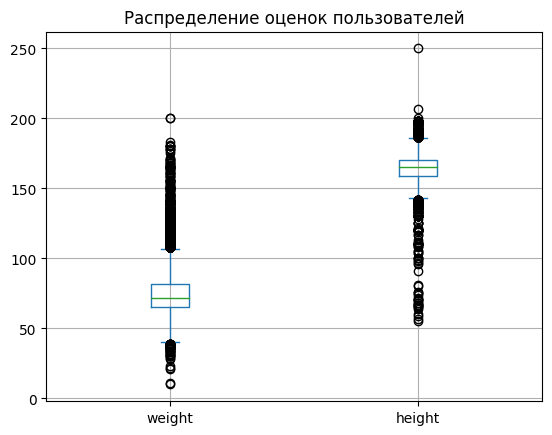

In [ ]:
# Проверяем вес и рост, видим что есть отклонения в обоих показателях, но они не являются критичными, т.к. люди с ростов 250 см и весом 200 кг могут быть
df2[['weight', 'height']].plot(kind='box',
                   title='Распределение оценок пользователей', grid=True)

<Axes: title={'center': 'Распределение оценок пользователей'}>

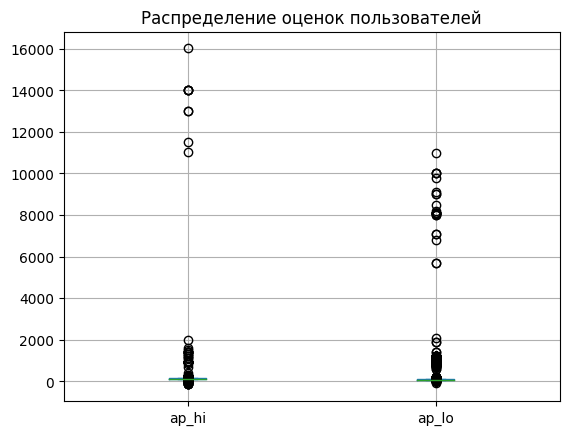

In [ ]:
# Проверяем систолическое артериальное давление(ap_hi) и диастолическое кровяное давление(ap_lo) и видим существенные выбросы
df2[['ap_hi', 'ap_lo']].plot(kind='box',
                   title='Распределение оценок пользователей', grid=True)

In [ ]:
# проверяем уникальные значения и видим выбивающиеся данные. Очень похоже на механическую ошибку (человеческий фактор), забыли поставить запятую и случайное появление знака минус. Для правильного анализа данные необходимо исправить
# df2['ap_lo'].unique()
# df2['ap_lo'].unique()

In [ ]:
# Исправляем данные в столбце систолическое артериальное давление(ap_hi)
def ap_hi_ок(dates):
  if dates['ap_hi'] < 0:
    return dates['ap_hi'] * -1
  elif dates['ap_hi'] < 50:
    return dates['ap_hi'] * 10
  elif dates['ap_hi'] <= 2:
    return dates['ap_hi'] * 100
  elif 2 < dates['ap_hi'] <= 20:
    return dates['ap_hi'] * 10
  elif dates['ap_hi'] > 1000:
    return dates['ap_hi'] // 100
  elif 1000 > dates['ap_hi'] > 250:
    return dates['ap_hi'] // 10
  else:
    return dates['ap_hi']
df2['ap_hi'] = df2.apply(ap_hi_ок, axis=1)

In [ ]:
# Исправляем данные в столбце систолическое артериальное давление(ap_hi)
def ap_lo_ок(dates):
  if dates['ap_lo'] < 0:
    return dates['ap_lo'] * -1
  elif dates['ap_lo'] < 50:
    return dates['ap_lo'] * 10
  elif dates['ap_lo'] <= 2:
    return dates['ap_lo'] * 100
  elif 2 < dates['ap_lo'] <= 20:
    return dates['ap_lo'] * 10
  elif dates['ap_lo'] >= 1000:
    return dates['ap_lo'] // 100
  elif 1000 > dates['ap_lo'] > 250:
    return dates['ap_lo'] // 10
  else:
    return dates['ap_lo']
df2['ap_lo'] = df2.apply(ap_lo_ок, axis=1)

In [ ]:
# df2

<Axes: title={'center': 'Распределение оценок пользователей'}>

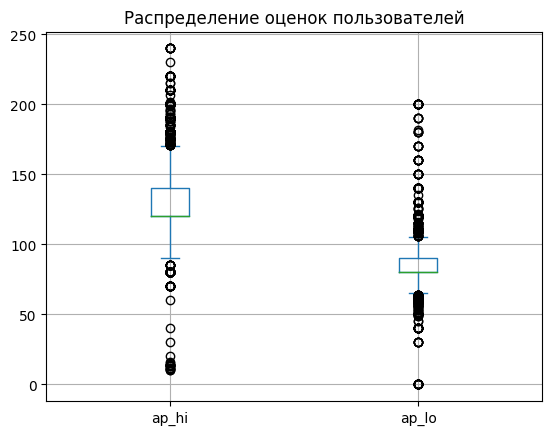

In [ ]:
# это уже похоже на правду диастолическое кровяное давление(ap_lo)
df2[['ap_hi', 'ap_lo']].plot(kind='box',
                   title='Распределение оценок пользователей', grid=True)

In [ ]:
# заменяем кодировки на расшифрованные подписи
df2['cholesterol'] = df2['cholesterol'].replace([1,2,3], ['normal', 'above normal', 'well above normal'])
df2['gluc'] = df2['gluc'].replace([1, 2, 3], ['normal', 'above normal', 'well above normal'])
df2['gender'] = df2['gender'].replace([1, 2], ['female', 'male'])
df2['smoke'] = df2['smoke'].replace([0, 1], ['no', 'yes'])
df2['alco'] = df2['alco'].replace([0, 1], ['no', 'yes'])
df2['active'] = df2['active'].replace([0, 1], ['no', 'yes'])
df2['cardio'] = df2['cardio'].replace([0, 1], ['no', 'yes'])
df2['age'] = (pd.to_datetime("today") - pd.to_datetime(df2['age']-25567, unit='D')).astype('<m8[Y]').astype('Int64')
df2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,73,male,168,62.0,110.0,80.0,normal,normal,no,no,yes,no
1,1,68,female,156,85.0,140.0,90.0,well above normal,normal,no,no,yes,yes
2,2,71,female,165,64.0,130.0,70.0,well above normal,normal,no,no,no,yes
3,3,75,male,169,82.0,150.0,100.0,normal,normal,no,no,yes,yes
4,4,75,female,156,56.0,100.0,60.0,normal,normal,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,70,male,168,76.0,120.0,80.0,normal,normal,yes,no,yes,no
69996,99995,61,female,158,126.0,140.0,90.0,above normal,above normal,no,no,yes,yes
69997,99996,71,male,183,105.0,180.0,90.0,well above normal,normal,no,yes,no,yes
69998,99998,62,female,163,72.0,135.0,80.0,normal,above normal,no,no,no,yes


In [ ]:
# добавляем столбец с возрастными группами
def age_group(dates):
  if dates['age'] < 55:
    return '<55'
  elif 55 <= dates['age'] <= 64:
    return '55 - 64'
  elif 65 <= dates['age'] <= 74:
    return '65 - 74'
  elif 75 <= dates['age'] <= 84:
    return '75 - 84'
  elif 85 <= dates['age'] <= 94:
    return '85 - 94'
  else:
    return '>95'
df2['age group'] = df2.apply(age_group, axis=1)

In [ ]:
# df2

In [ ]:
# сортируем основные показатели по возростным группам
df2_mean = df2[['height', 'weight', 'ap_hi', 'ap_lo', 'gender', 'age group']].groupby('age group').mean()
df2_mean

<ipython-input-206-0b170a77daee>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_mean = df2[['height', 'weight', 'ap_hi', 'ap_lo', 'gender', 'age group']].groupby('age group').mean()


,height,weight,ap_hi,ap_lo
age group,,,,
55 - 64,163.421839,74.938997,131.294640,83.288169
65 - 74,164.332187,74.369398,127.274047,81.954988
75 - 84,165.306716,73.183831,122.225854,79.518643
85 - 94,167.250000,67.250000,112.500000,72.500000


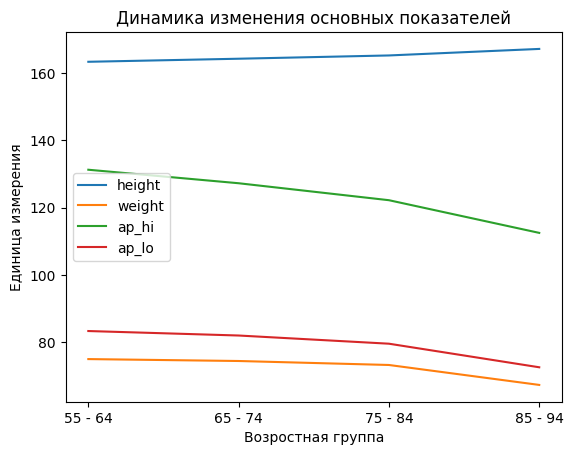

In [ ]:
# график изменения основных показалей в зависимости от возрастной группы
for region in df2_mean.columns:
    plt.plot(df2_mean.index, df2_mean[region])
plt.title('Динамика изменения основных показателей')
plt.xlabel('Возростная группа')
plt.ylabel('Единица измерения')
plt.legend(df2_mean)

<Axes: title={'center': 'Распределение возроста'}, ylabel='Frequency'>

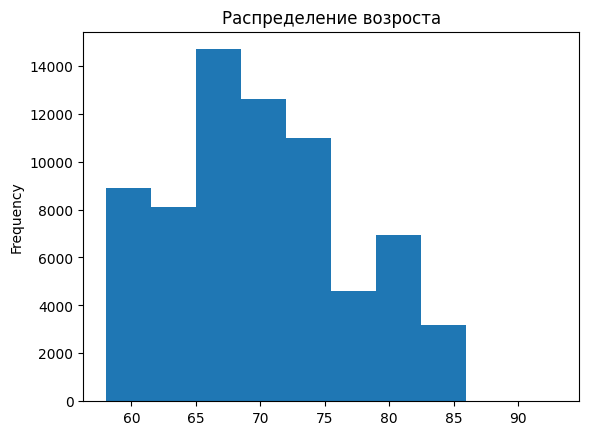

In [ ]:
# на графике хорошо видно распределение возроста пациентов
df2['age'].plot(kind='hist', title='Распределение возроста')

Text(0.5, 1.0, 'Сравнение значений артериального и кровяного давления')

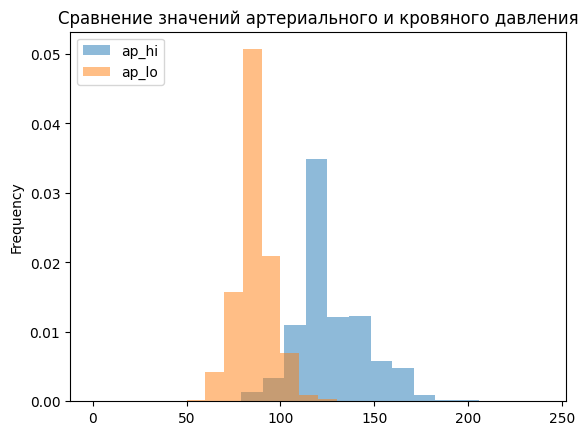

In [ ]:
df2['ap_hi'].plot(kind='hist',
                    alpha = 0.5,
                     bins=20,
                     density = True)


df2['ap_lo'].plot(kind='hist',
                    alpha = 0.5,
                     bins=20,
                     density = True)
plt.legend(loc='upper left')
plt.title('Сравнение значений артериального и кровяного давления')

In [ ]:
gender_smoke = df2[['gender', 'smoke', 'age group' ]].groupby('gender').value_counts()
gender_alco = df2[['gender', 'alco', 'age group' ]].groupby('gender').value_counts()
gender_active = df2[['gender', 'active', 'age group' ]].groupby('gender').value_counts()
# gender_smoke.head(30)

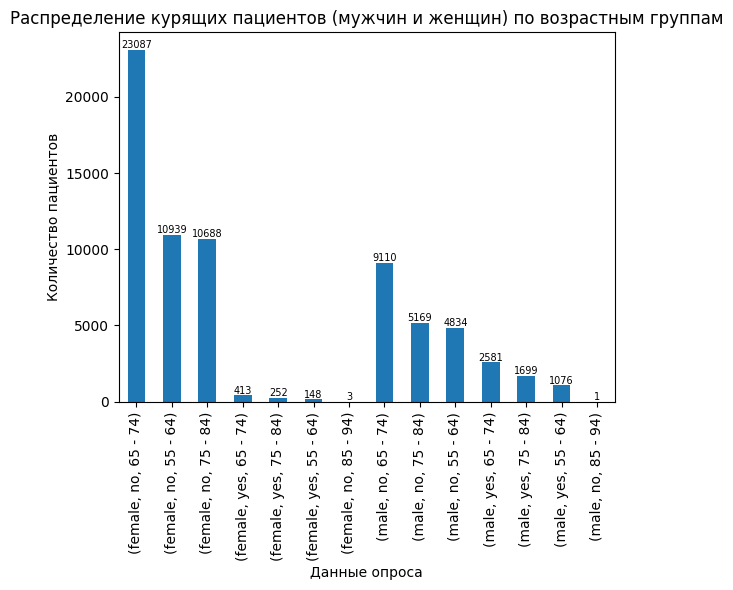

In [ ]:
gender_smoke.loc[['female', 'male']].plot(kind='bar',
                                                title='Распределение курящих пациентов (мужчин и женщин) по возрастным группам',
                                                xlabel='Данные опроса',
                                                ylabel='Количество пациентов')
for i, val in enumerate(gender_smoke.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':7})

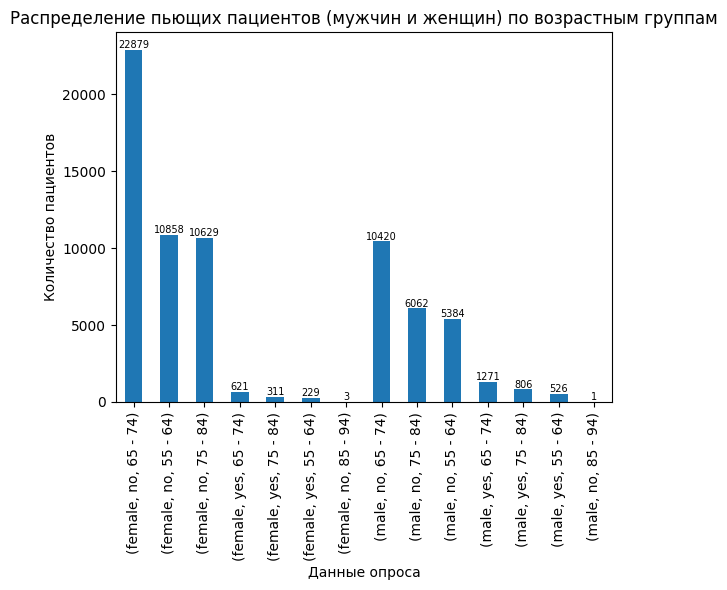

In [ ]:
gender_alco.loc[['female', 'male']].plot(kind='bar',
                                                title='Распределение пьющих пациентов (мужчин и женщин) по возрастным группам',
                                                xlabel='Данные опроса',
                                                ylabel='Количество пациентов')
for i, val in enumerate(gender_alco.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':7})

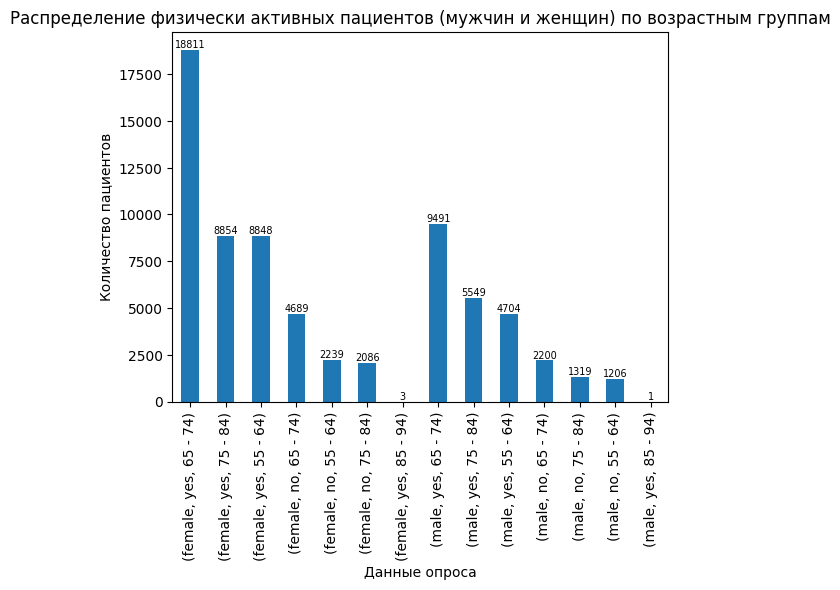

In [ ]:
gender_active.loc[['female', 'male']].plot(kind='bar',
                                                title='Распределение физически активных пациентов (мужчин и женщин) по возрастным группам',
                                                xlabel='Данные опроса',
                                                ylabel='Количество пациентов')
for i, val in enumerate(gender_active.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':7})

**Похожий анализ с другой библиотекой**

<Axes: xlabel='age', ylabel='count'>

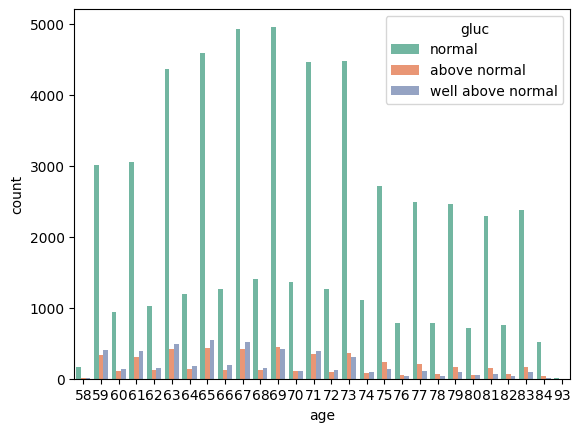

In [ ]:
# sns.countplot(x='age group', hue='cardio', data = df2, palette='Set2')
# sns.countplot(x='age group', hue='alco', data = df2, palette='Set2')
# sns.countplot(x='age group', hue='cholesterol', data = df2, palette='Set2')
sns.countplot(x='age', hue='gluc', data = df2, palette='Set2')

<Axes: xlabel='variable', ylabel='count'>

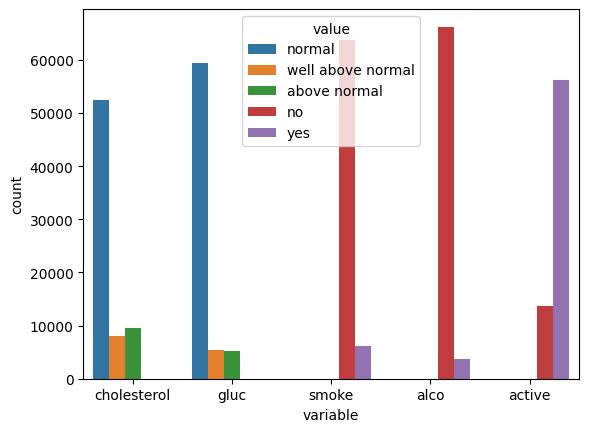

In [ ]:
df_categorical = df2.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x='variable', hue="value",data= pd.melt(df_categorical))

**Пытаемся найти зависимости**

(0.0, 250.0)

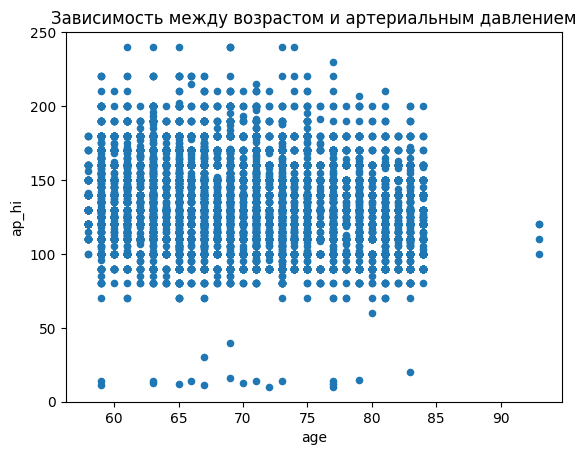

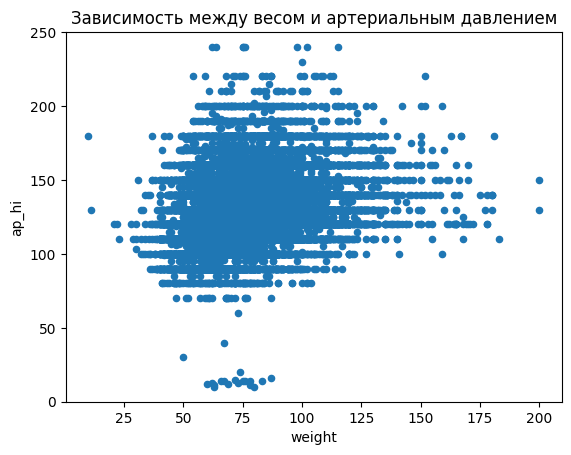

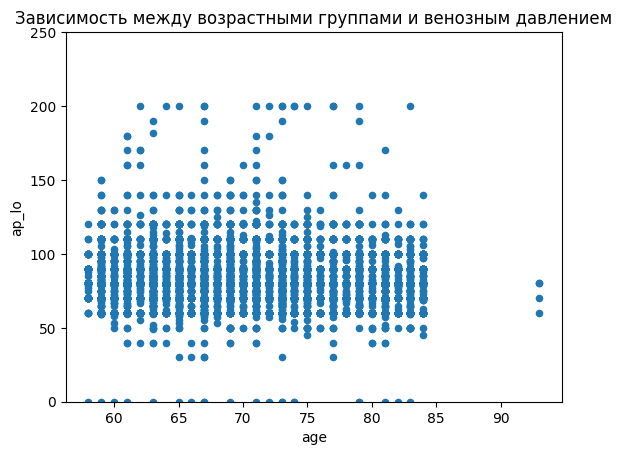

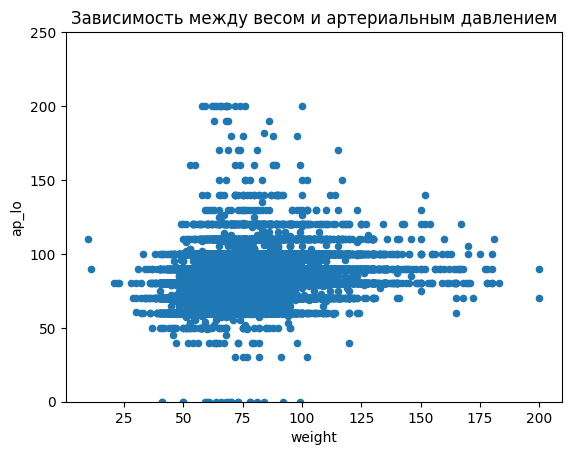

In [ ]:
df2.plot(kind='scatter',
        x= 'age',
        y= 'ap_hi',
        title='Зависимость между возрастом и артериальным давлением')
plt.ylim(0, 250)
df2.plot(kind='scatter',
        x= 'weight',
        y= 'ap_hi',
        title='Зависимость между весом и артериальным давлением')
plt.ylim(0, 250)


df2.plot(kind='scatter',
        x= 'age',
        y= 'ap_lo', # было бы здорово добавить количество пациентов из возростных групп для каждого значения
        title='Зависимость между возрастными группами и венозным давлением')
plt.ylim(0, 250)
df2.plot(kind='scatter',
        x= 'weight',
        y= 'ap_lo',
        title='Зависимость между весом и артериальным давлением')
plt.ylim(0, 250)
# видно что прямой зависимости между возрастом, весом и артериальным давлением и венозным давлением нет(что конечно очень сиранно....)

(0.0, 250.0)

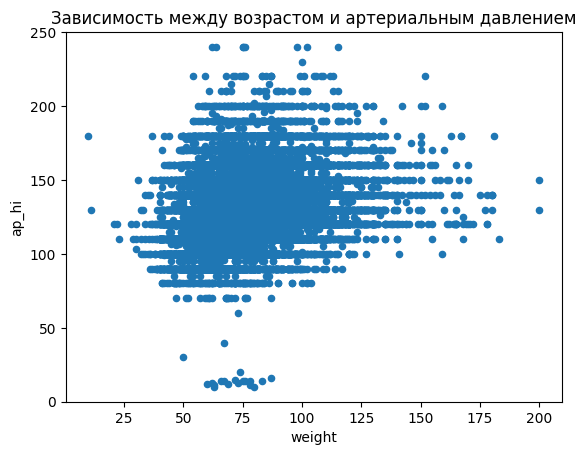

In [ ]:
df2.plot(kind='scatter',
        x= 'weight',
        y= 'ap_hi',
        title='Зависимость между возрастом и артериальным давлением')
plt.ylim(0, 250)
# df2.plot(kind='scatter',
#         x= 'age group',
#         y= 'cholesterol', # было бы здорово добавить количество пациентов из возростных групп для каждого значения
#         title='Зависимость между возрастными группами и уровнем холестерина')
# plt.ylim(-1, 3)

**Просто пробую библиотеку**

In [ ]:
import seaborn as sns

In [ ]:
df3 = pd.read_csv('cardio_train.csv', delimiter=';')
df3_stats = df3[['gluc', 'smoke', 'alco', 'active', 'cardio', 'gender']]
df3_stats.head()

,gluc,smoke,alco,active,cardio,gender
0,1,0,0,1,0,2
1,1,0,0,1,1,1
2,1,0,0,0,1,1
3,1,0,0,1,1,2
4,1,0,0,0,0,1


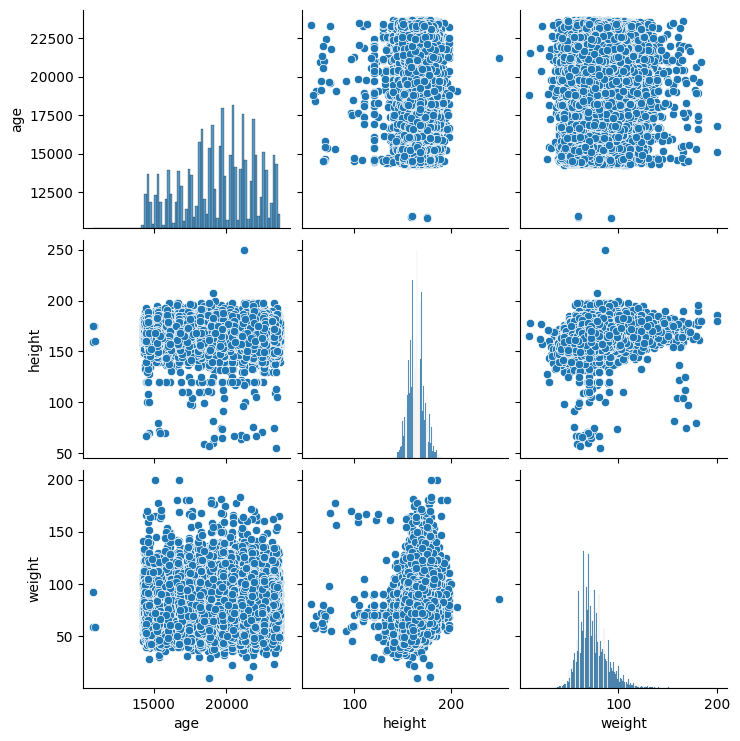

In [ ]:
sns.pairplot(df3[['age', 'height', 'weight']])